## Table of Contents

- [Feature Engineering:](#feature)
 Feature engineering is the process of selecting and transforming the relevant features (variables) in the data that are important for the machine learning model. This can involve creating new features, scaling or normalizing features, or selecting only the most relevant features for the model.



Import data treated


In [2]:
from datetime import date,datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

import matplotlib.pyplot as plt

# load the dataset
df = pd.read_csv('../Dataset/df_form_previous_step.csv')
df.head()

,EmployeeID,TicketChannel,TicketGroup,TicketID,TicketCreatedDate,ZendeskPlan,DayTicketSolved,AssigneeTier,FirstReplyTime,FullResolutionTime,NumAgentComments,NumPublicComments,TicketEscalated,CustomerSatisfaction,WorkerDateHired,WorkerLocation,Worker_Type,WorkerTenure
0,1,api,Support (T1),2840334,2017-08-04,Trial,Sunday,Tier 1,13.0,33861.0,18.0,36.0,0,NaN,2011-10-18,London,Employee,2117
1,1,email,Support (T1),2136496,2017-01-09,Unknown,Wednesday,Tier 1,58.0,73659.0,30.0,70.0,1,1.0,2011-10-18,London,Employee,1910
2,1,facebook,Support (Triage),3034987,2017-10-12,Professional,Friday,Triage,30.0,1741.0,6.0,15.0,0,NaN,2011-10-18,London,Employee,2186
3,1,email,Support (T1),2311824,2017-03-02,Unknown,Sunday,Tier 1,78.0,25654.0,5.0,15.0,0,NaN,2011-10-18,London,Employee,1962
4,1,email,Support (T1),2213615,2017-01-30,Professional,Friday,Tier 1,4.0,16266.0,8.0,17.0,0,0.0,2011-10-18,London,Employee,1931


### Feature Engineering <a id='feature'></a>

This is where we are going transform, create and select the features to be used in the machine learning model.

- Feature Selection: Feature selection involves identifying the most relevant features for the machine learning model. This can involve techniques such as correlation analysis, principal component analysis (PCA), or feature importance ranking.
- Feature Extraction: Feature extraction involves creating new features by combining or transforming the existing features. This can involve techniques such as polynomial features, interaction terms, or dimensionality reduction.
- Feature Scaling: Feature scaling involves rescaling the features so that they have a similar scale. This can help to improve the performance of machine learning models and prevent one feature from dominating the analysis.
- Feature Validation: Feature validation involves testing the performance of the machine learning model using the new features. This can involve techniques such as cross-validation or hold-out validation.

First we are going to extract new information:
- Statistical data about the employee performance

In [2]:
#Add new features

# Convert TicketCreatedDate to datetime format
df['TicketCreatedDate'] = pd.to_datetime(df['TicketCreatedDate'])

# Create MonthCreated and MonthSolved columns
df['MonthCreated'] = df['TicketCreatedDate'].dt.to_period('M')

# Create a new column MonthSolved
df["TicketEndDate"] = df["TicketCreatedDate"] + pd.to_timedelta(df["FullResolutionTime"], unit='m')

# Extract the month from the MonthSolved column
df["MonthSolved"] = df["TicketEndDate"].dt.to_period('M')


# Generalize group of the ticket
df['TicketGroup_Group']=df['TicketGroup'].str.split('(').str[0]
# Define a function to categorize WorkerTenure
def categorize_tenure(tenure_days):
    tenure_months = round(tenure_days / 30.5)  # Convert days to months, rounding to nearest month
    if tenure_months <= 6:
        return "1-6 Months"
    elif tenure_months <= 12:
        return "7-12 Months"
    elif tenure_months <= 18:
        return "1 Year - 1 Year 6 Months"
    elif tenure_months <= 24:
        return "1 Year 7 Months - 2 Years"
    elif tenure_months <= 36:
        return "2 Year - 3 Years"
    elif tenure_months <= 48:
        return "3 Year - 4 Years"
    elif tenure_months <= 60:
        return "4 Year - 5 Years"
    else:
        return "More than 5 Years"

# Create new column WorkerTenure6Months
df["WorkerTenure6Months"] = df["WorkerTenure"].apply(categorize_tenure)

# Define the order of categories based on tenure months
cat_order = ["1-6 Months", "7-12 Months", "1 Year - 1 Year 6 Months", 
             "1 Year 7 Months - 2 Years", "2 Year - 3 Years", 
             "3 Year - 4 Years", "4 Year - 5 Years", "More than 5 Years"]

# Convert WorkerTenure6Months to categorical data type with the specified order
df["WorkerTenure6Months"] = pd.Categorical(df["WorkerTenure6Months"], categories=cat_order)


#Statistical Data about the employee

#Number of tickets each employee has for each date of ticketCreation 
df_count =df.groupby(['EmployeeID', 'TicketCreatedDate'])['TicketID'].count().reset_index().rename(columns={'TicketID': 'TicketsCreatedCount'})
df = pd.merge(df, df_count, on=['EmployeeID', 'TicketCreatedDate'], how='left')

#Number of tickets each employee has for each month
df_count =df.groupby(['EmployeeID', 'MonthCreated'])['TicketID'].count().reset_index().rename(columns={'TicketID': 'TicketsMonthCreatedCount'})
df = pd.merge(df, df_count, on=['EmployeeID', 'MonthCreated'], how='left')

#Mean time that took to full resolution time for each employee and for each date of ticketCreatedDate
df_count =df.groupby(['EmployeeID', 'TicketCreatedDate'])['FullResolutionTime'].mean().reset_index().rename(columns={'FullResolutionTime': 'FullResolutionTime_AVG_TickectCreatedDate'})
df = pd.merge(df, df_count, on=['EmployeeID', 'TicketCreatedDate'], how='left')

#Mean time that took to full resolution time for each employee and for each month
df_count =df.groupby(['EmployeeID', 'MonthCreated'])['FullResolutionTime'].mean().reset_index().rename(columns={'FullResolutionTime': 'FullResolutionTime_AVG_TickectMonthCreated'})
df = pd.merge(df, df_count, on=['EmployeeID', 'MonthCreated'], how='left')

df.head()

,EmployeeID,TicketChannel,TicketGroup,TicketID,TicketCreatedDate,ZendeskPlan,DayTicketSolved,AssigneeTier,FirstReplyTime,FullResolutionTime,...,WorkerTenure,MonthCreated,TicketEndDate,MonthSolved,TicketGroup_Group,WorkerTenure6Months,TicketsCreatedCount,TicketsMonthCreatedCount,FullResolutionTime_AVG_TickectCreatedDate,FullResolutionTime_AVG_TickectMonthCreated
0,1,api,Support (T1),2840334,2017-08-04,Trial,Sunday,Tier 1,13.0,33861.0,...,2117,2017-08,2017-08-27 12:21:00,2017-08,Support,More than 5 Years,1,37,33861.000000,6789.486486
1,1,email,Support (T1),2136496,2017-01-09,Unknown,Wednesday,Tier 1,58.0,73659.0,...,1910,2017-01,2017-03-01 03:39:00,2017-03,Support,More than 5 Years,6,147,17450.333333,8048.435374
2,1,facebook,Support (Triage),3034987,2017-10-12,Professional,Friday,Triage,30.0,1741.0,...,2186,2017-10,2017-10-13 05:01:00,2017-10,Support,More than 5 Years,6,109,10483.833333,9566.394495
3,1,email,Support (T1),2311824,2017-03-02,Unknown,Sunday,Tier 1,78.0,25654.0,...,1962,2017-03,2017-03-19 19:34:00,2017-03,Support,More than 5 Years,11,250,9450.000000,6973.632000
4,1,email,Support (T1),2213615,2017-01-30,Professional,Friday,Tier 1,4.0,16266.0,...,1931,2017-01,2017-02-10 07:06:00,2017-02,Support,More than 5 Years,2,147,19666.500000,8048.435374


# Feature Selection
- Improve Model Accuracy
- Lower Computational Cost
- Easier to Understand & Explain

Whays:
- [Correlation Matrix:](#corr)

A correlation matrix is simply a table which displays the correlation coefficients for different variables.

- [Univariate Testing:](#univariate)


Univariate Feature Selection or Testing applies statistical tests to find relationships between the output variable and each input variable in isolation. Tests are conducted one input variable at a time. The tests depends whether you are running a regression task or a classification task.

Regression Task
In a regression task, you may be provided with an 
1. f-score ->  Is a measure of a model's accuracy that balances precision and recall. It is the harmonic mean of precision and recall.The F-score is particularly useful when dealing with imbalanced classes,
2. p-value -> Is a measure that avaluates the difference between two outcomes for example(the lower the better, and its used to prove the Null Hypothesis that is when we can be sure that the two groups are the same):
For example, let's say we want to test if there is a difference in the mean heights of two groups of people, group A and group B. The null hypothesis would be that the mean height of group A is equal to the mean height of group B. We can use a t-test to compute the p-value, and if the p-value is less than or equal to our level of significance (e.g. 0.05), we can reject the null hypothesis and conclude that there is a statistically significant difference in the mean heights of the two groups.


- [Recursive Feature Elimination with Cross-Validation (RFECV):](#rfecv)

RFE is popular because it is easy to configure and use and because it is effective at selecting those features in a training dataset that are more or most relevant in predicting the target variable



### Correlation Matrix: <a id='corr'></a>

In [3]:
#Scale data so i can use a person correlation algorithm

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler object
scaler = StandardScaler()

# Scale the numerical columns in the DataFrame
df_scaled = scaler.fit_transform(df.select_dtypes(include='number'))

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.select_dtypes(include='number').columns)


# Concatenate the scaled data with the non-numerical columns
df_scaled = pd.concat([df_scaled, df.select_dtypes(exclude='number')], axis=1)


C:\Users\Pedro\AppData\Local\Temp\ipykernel_18808\1240085090.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_scaled.corr(method='pearson')


Text(0.5, 1.0, 'Correlation Matrix')

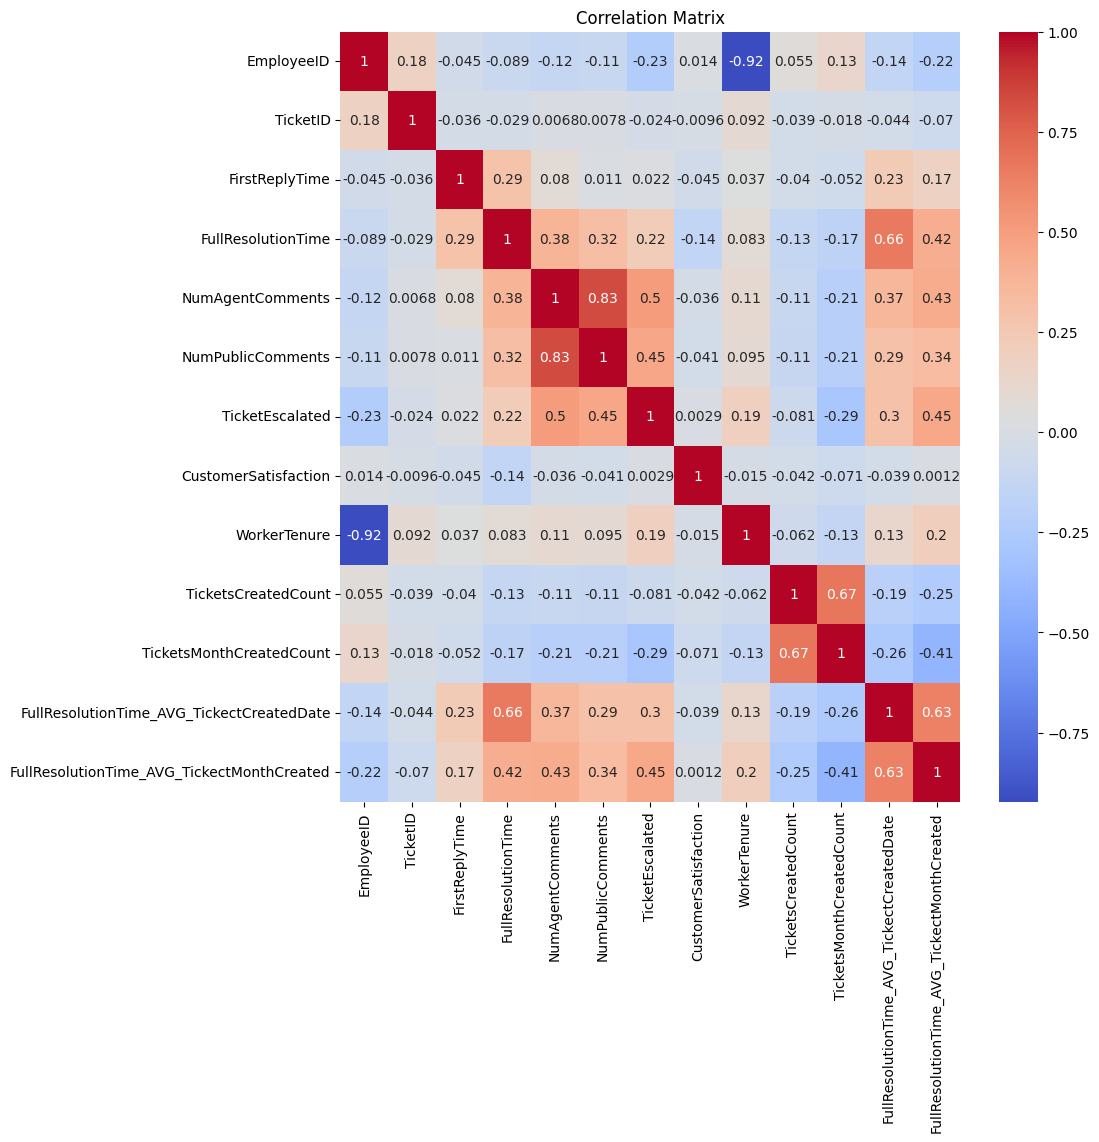

In [4]:
# Calculate Pearson correlation coefficient between all pairs of variables
corr_matrix = df_scaled.corr(method='pearson')

# Set up the heatmap figure
fig, ax = plt.subplots(figsize=(10,10))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# Set title
ax.set_title('Correlation Matrix')



### Univariate Testing: <a id='univariate'></a>


In [5]:
# filter only for data with records
my_df=df[df['CustomerSatisfaction'].notnull()]
categorical_cols = ["TicketChannel","TicketGroup_Group","ZendeskPlan","MonthCreated", "MonthSolved","ZendeskPlan", "AssigneeTier", "WorkerLocation","DayTicketSolved","WorkerTenure6Months"]


Regression Task

In [6]:
from sklearn.feature_selection import SelectKBest, f_regression


X = my_df.drop(["CustomerSatisfaction"], axis = 1)
y = my_df["CustomerSatisfaction"]

feature_selector = SelectKBest(f_regression, k = "all")
fit = feature_selector.fit(X,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "f_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["f_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = X[selected_variables]

ValueError: could not convert string to float: 'email'

Classification Task


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

cols_to_encode = [col for col in categorical_cols if col in my_df.columns]


# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(my_df.drop(["CustomerSatisfaction"], axis=1), columns=cols_to_encode)
X = X.drop(cols_to_encode, axis=1)

y = my_df["CustomerSatisfaction"]

feature_selector = SelectKBest(chi2, k = "all")
fit = feature_selector.fit(X,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "chi2_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["chi2_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = X[selected_variables]

KeyError: "['TicketChannel' 'TicketGroup_Group' 'ZendeskPlan' 'MonthCreated'\n 'MonthSolved' 'ZendeskPlan' 'AssigneeTier' 'WorkerLocation'\n 'DayTicketSolved' 'WorkerTenure6Months'] not found in axis"

### Recursive Feature Elimination with Cross-Validation (RFECV): <a id='rfecv'></a>

In [ ]:
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


X = my_df.drop(["output"], axis = 1)
y = my_df["output"]

regressor = LinearRegression()
feature_selector = RFECV(regressor)

fit = feature_selector.fit(X,y)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal numer of features: {optimal_feature_count}")

X_new = X.loc[:, feature_selector.get_support()]

plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_, marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.grid_scores_), 4)})")
plt.tight_layout() 
plt.show()

## Save Data for Model Selection Step

In [ ]:
# save the DataFrame to a CSV file
next_directory="5 - Model Selection"
df.to_csv('../../'+next_directory +'/Dataset//df_form_previous_step.csv', index=False)